In [1]:
import glob
fs=glob.glob('../bZoneProfs/profs2018*nc')

In [2]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
zmL=[[]for k in range(13)]
zmKaL=[[]for k in range(13)]
pRateL=[[]for k in range(13)]
for f in sorted(fs)[:]:
    fh=nc.Dataset(f)
    pType=fh['pType'][:]
    zm=fh['zm'][:]
    pRate=fh['pRate'][:]
    bzd=fh['bzd'][:]
    bsfc=fh['bsfc'][:]
    bcFree=fh['bcFree'][:]
    for i,zkum in enumerate(zm[:,:,0]):
        for k in range(13):
            if (pType[i,0]==1) and abs(bzd[i]-160+2*k)<2:
                zkum[bcFree[i]-90:]=0
                zkam=zm[i,:,1]
                zkam[bcFree[i]-90:]=0
                pRate1=pRate[i,:]
                pRate1[bcFree[i]-90:]=0
            #print(bzd[i],zkum[150-90:150-90+5])
                if bcFree[i]>=168:
                    zmL[k].append(zkum)
                    zmKaL[k].append(zkam)
                    pRateL[k].append(pRate1)
    #print(fh)
    #break


124751 0
123910 1
114483 2
106663 3
114004 4
107361 5
98384 6
73554 7
60145 8
60376 9
65307 10
66100 11
53265 12


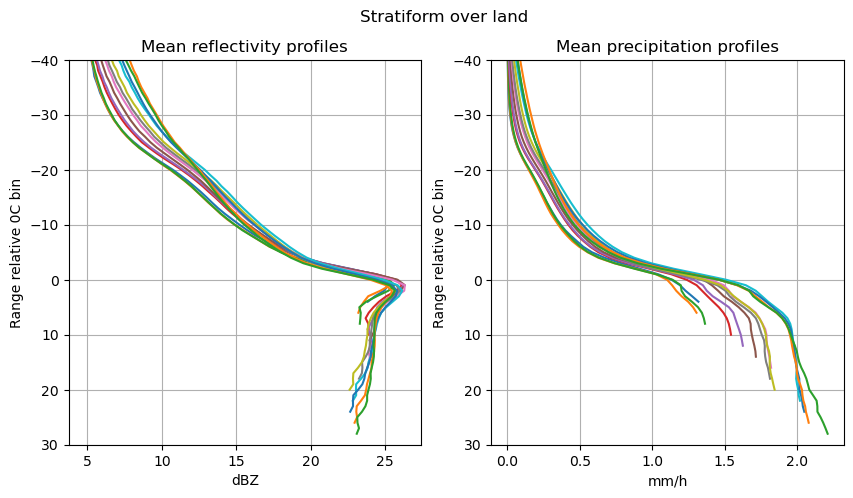

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(121)
for k in range(13):
    zmLk=np.array(zmL[k])
    zmLk[zmLk<0]=0
    plt.plot(zmLk.mean(axis=0)[:75],np.arange(75)+2*k-70)
    #plt.plot(zmLk.mean(axis=0)[(160-2*k-90):(160-2*k-90)+1],np.arange(70-2*k,70-2*k+1)+2*k-70,'*')
    print(len(zmLk),k)
    plt.xlabel('dBZ')
    plt.ylabel('Range relative 0C bin')
plt.ylim(30,-40)
#plt.figure()
plt.grid()
plt.title('Mean reflectivity profiles')
plt.subplot(122)
for k in range(13):
    pRateLk=np.array(pRateL[k])
    pRateLk[pRateLk<0]=0
    plt.plot(pRateLk.mean(axis=0)[:75],np.arange(75)+2*k-70)
    #plt.plot(zmLk.mean(axis=0)[(160-2*k-90):(160-2*k-90)+1],np.arange(70-2*k,70-2*k+1)+2*k-70,'*')
    plt.xlabel('mm/h')
    plt.ylabel('Range relative 0C bin')
plt.ylim(30,-40)
plt.title('Mean precipitation profiles')
plt.grid()
plt.suptitle('Stratiform over land')
plt.savefig('reflectivityProfiles.png',dpi=300)


In [ ]:

import xarray as xr
zkumx=[]
zkamx=[]
pRatex=[]
bzdx=xr.DataArray(160-np.arange(13)*2,dims=['nbins'])
d={}
for k in range(13):
    zkumx.append(xr.DataArray(np.array(zmL[k]),dims=['time%2.2i'%k,'range']))
    zkamx.append(xr.DataArray(np.array(zmKaL[k]),dims=['time%2.2i'%k,'range']))
    pRatex.append(xr.DataArray(np.array(pRateL[k]),dims=['time%2.2i'%k,'range']))
    d["zkum%2.2i"%k]=zkumx[k]
    d["zkam%2.2i"%k]=zkamx[k]
    d["pRate%2.2i"%k]=pRatex[k]
d["bzd"]=bzdx
ds=xr.Dataset(d)

#a=np.nonzero(pType[:,0]==1)
#b=np.nonzero(abs(bzd[a]-160)<3)
#print(len(b[0]))
#print(zm.shape)

In [83]:
comp = dict(zlib=True, complevel=5)
encoding = {var: comp for var in ds.data_vars}
ds.to_netcdf('stratiformProfiles.nc',encoding=encoding)

269455


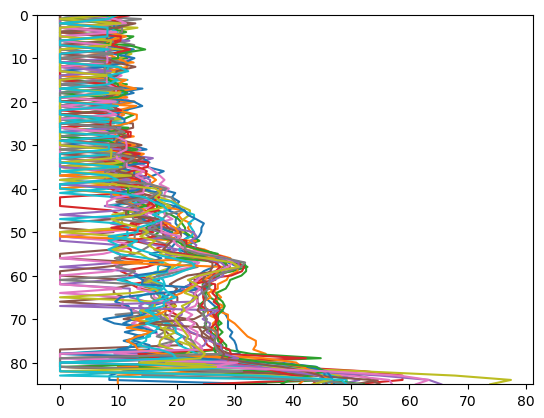

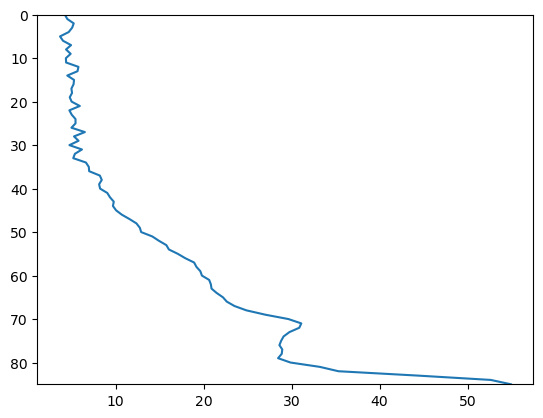

In [36]:
for i in range(100,130):
    plt.plot(zmL[i],np.arange(86))

plt.ylim(85,0)
plt.figure()
plt.plot(zmL[130:230,:].mean(axis=0),np.arange(86))
plt.ylim(85,0)
print(len(zmL))

In [21]:
print(bzd)

[137 173 174 ... 174 175 174]
